# **Project CAD Group 19 | Main Results File**

#### 0: Initialization

In [1]:
## Imports
%matplotlib inline
import sys
sys.path.append("../code")
import numpy as np
import cad_project
from cad_project import nuclei_classification

c:\Users\quint\miniconda3\envs\8dc00\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# 1: Logistical Regression

#### 1.1: Without PCA

Testing mu=0.0004898, batch_size=57
Best hyperparameters: mu=0.0004898, batch_size=57
Best validation loss: 0.5103956927090753
Test accuracy: 0.74


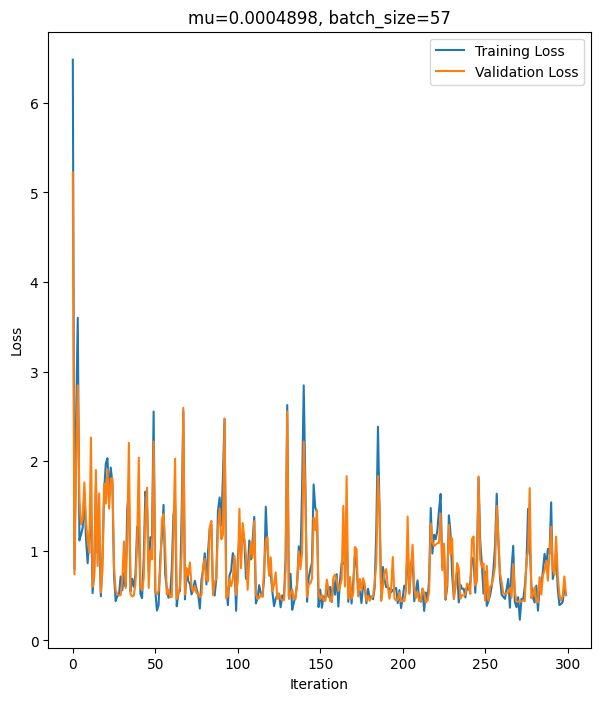

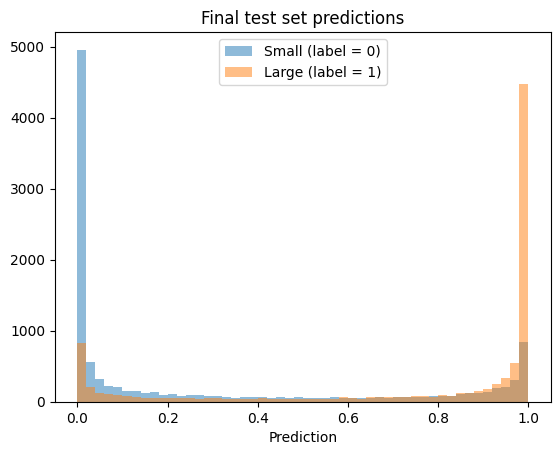

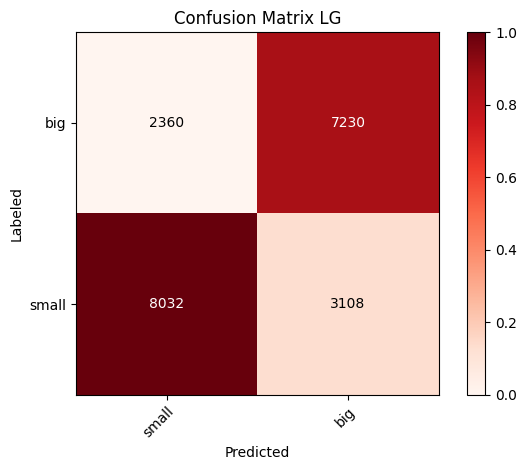

In [8]:
## Finding good parameters using a random search with 100 trials using 30 iterations. 
# This takes aprox. 5 mins. Should be skipped if it has already ran once.
skip_param_search = True
best_params = nuclei_classification(use_PCA=False,plot=False) if not skip_param_search else None

# Running the model with previously found parameters after 100 random search iterations
# with search validation loss (30 iters): ca. 2.9,
# full validation loss (300 iters): ca. 0.7:
if best_params == None:
    mu = mu=0.0004898
    batch_size=57
else:
    mu,batch_size = best_params

# Run model with 300 iterations
nuclei_classification(use_PCA=False,plot=True,static_params=[mu,batch_size])

#### 1.2: With PCA

95.0% explained using 133 components.
Testing mu=0.0001114, batch_size=158
Best hyperparameters: mu=0.0001114, batch_size=158
Best validation loss: 0.434563775045056
Test accuracy: 0.82


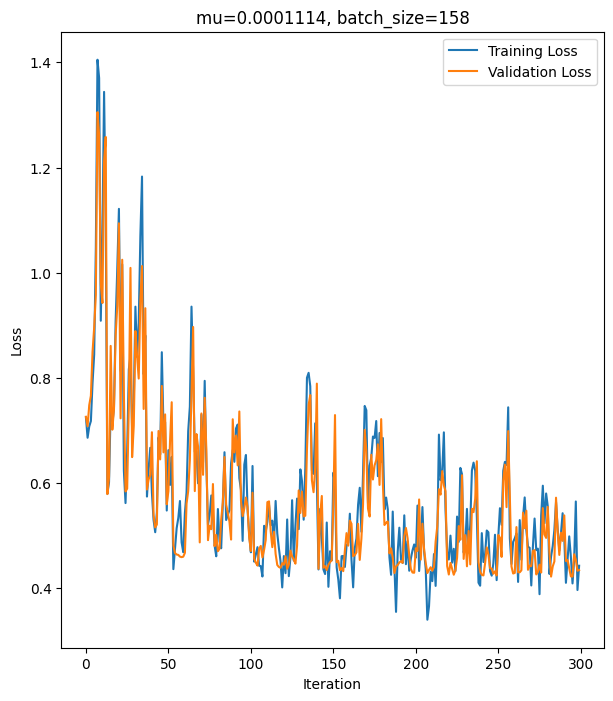

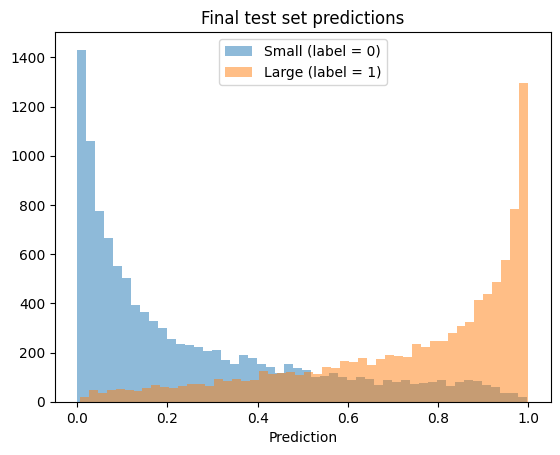

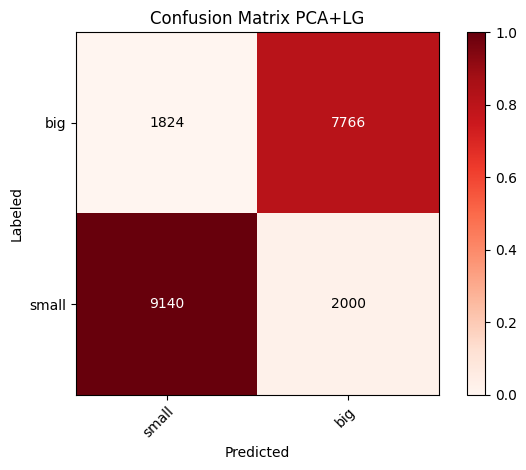

In [7]:
## Finding good parameters using a random search with 100 trials using 30 iterations. 
# This takes aprox. 5 mins. Should be skipped if it has already ran once.
skip_param_search = True
best_params = nuclei_classification(use_PCA=True,plot=False) if not skip_param_search else None

# Running the model with previously found parameters after 100 random search iterations
# with search validation loss : ca. 0.523,
# full validation loss (epoch 100): consistently ca. 0.4:
if best_params == None:
    mu=0.0001114
    batch_size=158
else:
    mu,batch_size = best_params

# Run model
nuclei_classification(use_PCA=True,plot=True,static_params=[mu,batch_size])


# 2: Convolutional Neural Network

#### 2.1: Without PCA

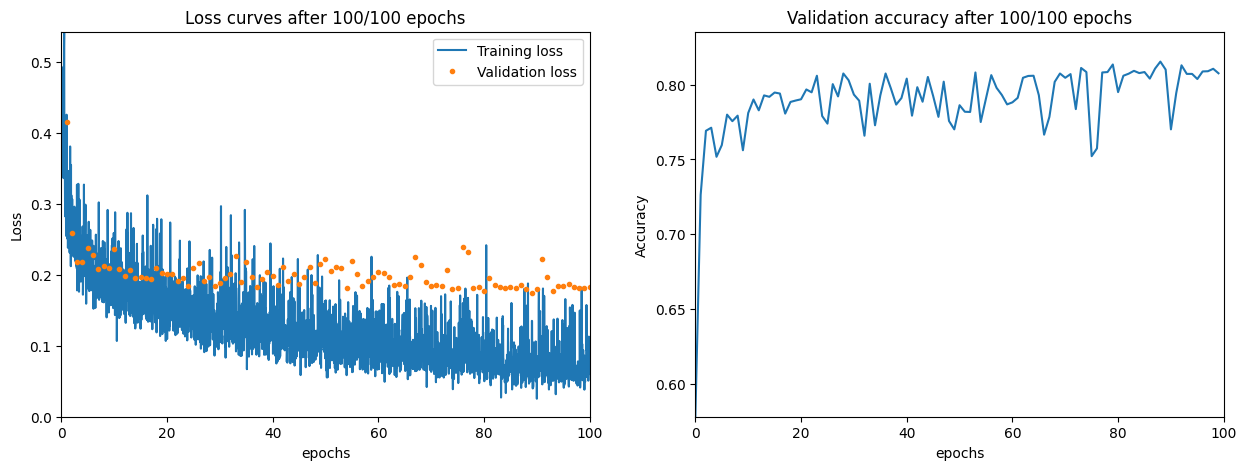

> Training finished with accuracy = 0.8076133095987951
Test accuracy: 0.80


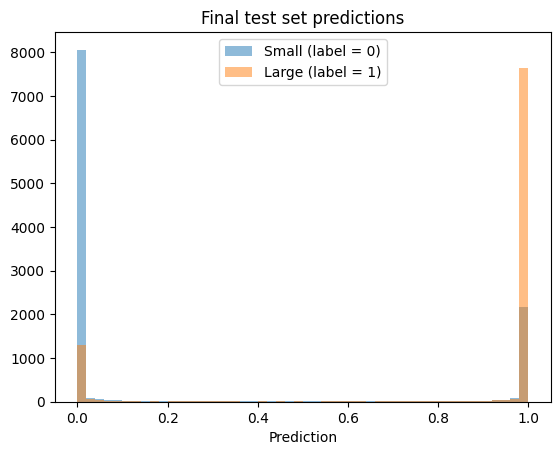

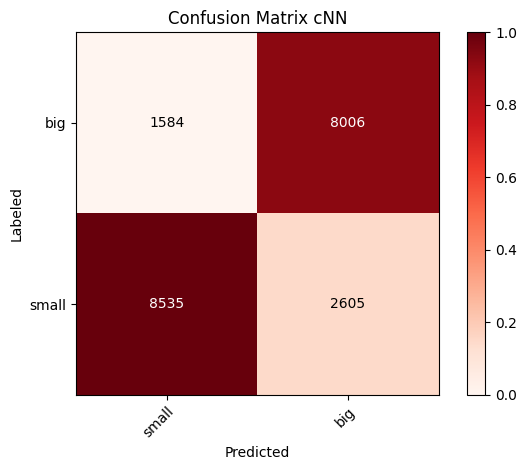

0.7979257115291848

In [3]:
# getting good parameters using random search with 100 iterations.
# This takes approx. 45m to run. This search should be skipped if it has already been run once.
skip_param_search = True

if not skip_param_search:
    ## dataset preparation (standard)
    nuclei_class_nn_param = cad_project.Training()
    nuclei_class_nn_param.data_preprocessing()

    ## define starting parameters using a randomized search using 10 epochs
    # chosen ranges to search: learning_rate = [0.001, 0.05], batch_size = [128, 512], hidden_features = [500, 2000]
    best_params_param = nuclei_class_nn_param.get_hyperparameters(n_trials=100)

# previously found best parameters using above code,
# with search validation accuracy (epoch 10): ca. 0.793,
# full validation accuracy (epoch 100): ca. 0.807:
learning_rate = 0.0204
batch_size = 465 
hidden_features = 1526

nuclei_class_nn = cad_project.Training()
nuclei_class_nn.data_preprocessing()
#nuclei_class_nn.define_shapes(0.005, 256, 1000)
nuclei_class_nn.define_shapes(learning_rate,batch_size,hidden_features)

# start training
nuclei_class_nn.launch_training(100,True)

# Results of NN training
nuclei_class_nn.pass_on_test_set()

#### 2.2 with PCA-fitted dataset

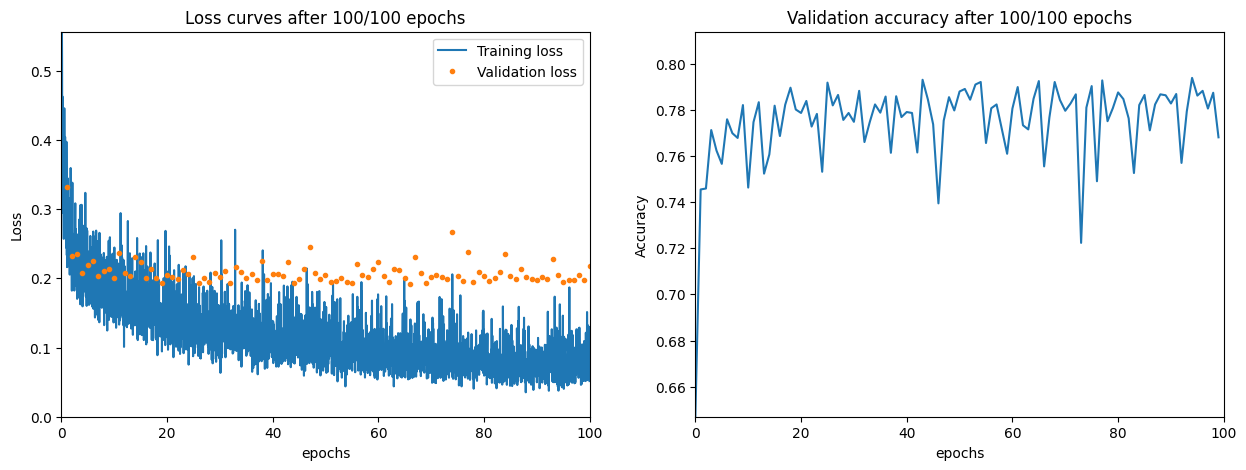

> Training finished with accuracy = 0.7680405312885116
Test accuracy: 0.78


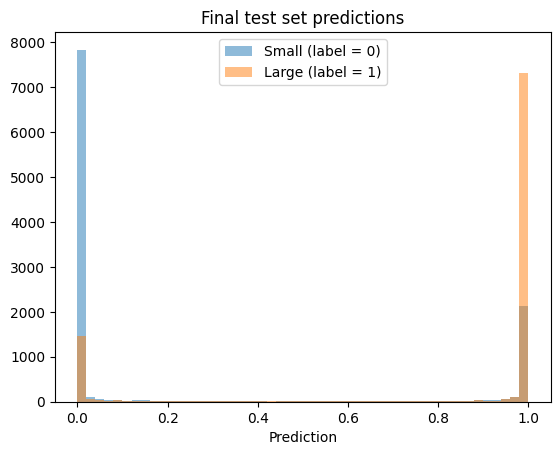

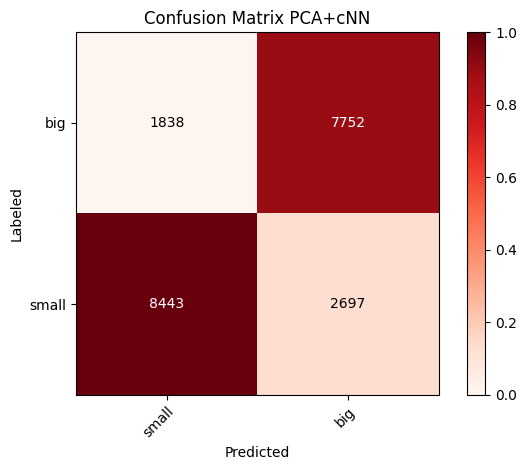

0.7812349252291365

In [9]:
# getting good parameters using random search with 100 iterations.
# This takes approx. 45m to run. This search should be skipped if it has already been run once.
skip_param_search = True

if not skip_param_search:
    ## dataset preparation (standard) but now with PCA:
    nuclei_class_nn_param = cad_project.Training()
    nuclei_class_nn_param.data_preprocessing_PCA() # PCA!

    ## define starting parameters using a randomized search using 10 epochs
    # chosen ranges to search: learning_rate = [0.001, 0.05], batch_size = [128, 512], hidden_features = [500, 2000]
    best_params_param  = nuclei_class_nn_param.get_hyperparameters(n_trials=100)

# previously found best parameters using above code,
# with search validation accuracy (epoch 10): ca. 0.796,
# full validation accuracy (epoch 100): ca. 0.781:
learning_rate = 0.020414941624687665
batch_size = 363
hidden_features = 707

nuclei_class_nn = cad_project.Training()
nuclei_class_nn.data_preprocessing_PCA()
#nuclei_class_nn.define_shapes(0.005, 256, 1000)
nuclei_class_nn.define_shapes(learning_rate,batch_size,hidden_features)

# start training
nuclei_class_nn.launch_training(100,True)

# Results of NN training
nuclei_class_nn.pass_on_test_set()

# 3: k Nearest Neighbours

Labeled data shape: (1400, 134)
Testing K = 1
Validation loss for K = 1: 0.4
Testing K = 3
Validation loss for K = 3: 0.3766666666666667
Testing K = 5
Validation loss for K = 5: 0.365
Testing K = 7
Validation loss for K = 7: 0.369
Testing K = 9
Validation loss for K = 9: 0.35699999999999993


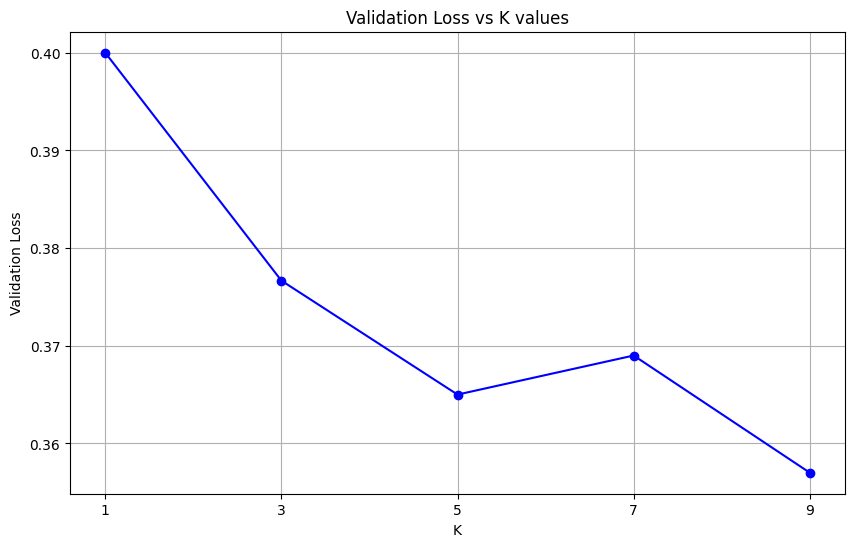

Best K: 9, with validation loss: 0.35699999999999993
Test Accuracy with K = 9: 0.6740472744814279


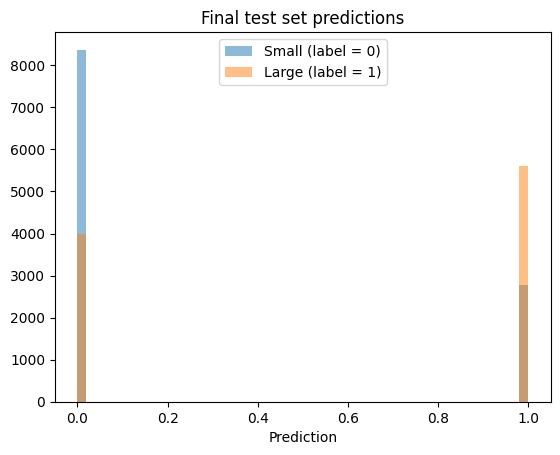

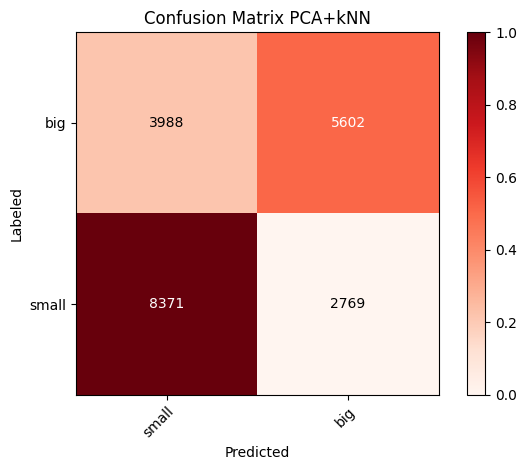

(9, 0.35699999999999993, 0.6740472744814279)

In [2]:
# Run k Nearest Neighbors
cad_project.KNearestOptimized()

# Something of note:
Throughout training of the model, validation and training loss values start to differ greatly (reaching ca. >0.1) signaling an overfit to the training data. While this can be symptomatic of a variety of issues, a common and logiscal explanation would be that the training data has not been prepaired properly. Best plan of action: remove outliers from the dataset.